In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
np.random.seed(0)
n_samples = 1000
df = pd.DataFrame({
    f'feature_{i}': np.random.normal(loc=i*5, scale=1+i, size=n_samples)
    for i in range(1, 5)
})

In [3]:
stats = {}
for i in (2, 4):
    col = f'feature_{i}'
    stats[i] = {
        'mean': df[col].mean(),
        'std':  df[col].std()
    }

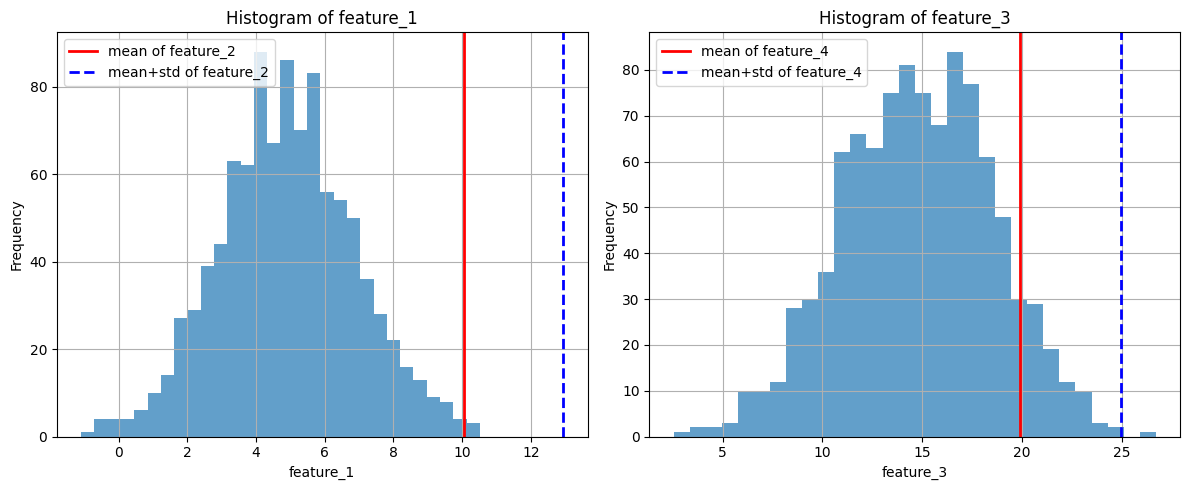

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for ax, odd in zip(axes, (1, 3)):
    odd_col = f'feature_{odd}'
    df[odd_col].hist(bins=30, ax=ax, alpha=0.7)
    ax.set_title(f'Histogram of {odd_col}')
    ax.set_xlabel(odd_col)
    ax.set_ylabel('Frequency')
    
    # 4) Додаємо vertical lines для "сусіднього" парного стовпчика
    even = odd + 1
    m = stats[even]['mean']
    s = stats[even]['std']
    
    # лінія в положенні mean
    ax.axvline(m, color='red',   linestyle='-',  linewidth=2,
               label=f'mean of feature_{even}')
    # лінія в положенні mean + std
    ax.axvline(m + s, color='blue',  linestyle='--', linewidth=2,
               label=f'mean+std of feature_{even}')
    
    ax.legend()

plt.tight_layout()
plt.show()